## candidates from CDIPS paper

In [1]:
import numpy as np

tics = np.loadtxt('../data/TablesBouma2019/cdips_candidates.txt', dtype=int)
tics

array([ 140978827,  853388144,  298077526,  396368313,  467522800,
        859480036,  444222135,  133323306,  462162963,   46029346,
        462162963,  269861070,  260119000,  432564189,  359357695,
        306385801,   92896631,  432925586,  463903016,  180987952,
        133260600,   93275779,  135036669,  308425348,   46029346,
        269861070, 1030389830,  238611475,   92896631,  133323306,
        859480036,  268301217,  238616144,  378421253,  459997997,
         46029346,  269861070,  460024410,  146129309,  306385801])

In [2]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [3]:
import os
from tqdm import tqdm
import deepdish as dd

clobber = False
fp = '../data/cdips_candidates.hdf5'
if not os.path.exists(fp) or clobber:
    lcs = {}
    for tic in tqdm(tics):
        print(f'TIC {tic}')
        lcs2 = {}
        t = cr.Target(ticid=tic, verbose=False)
        for sector in t.get_all_sectors():
            try:
                if sector in cr.cdips.CDIPS_SECTORS:
                    print(f'sector={sector}')
                    cdips = cr.CDIPS(ticid=tic, sector=sector, verbose=False)
                    lc = cdips.lc
                    lcs2[sector] = lc
            except Exception as e:
                print(e)
        lcs[tic] = lcs2
    dd.io.save(fp, lcs)
    print(f'Saved: {fp}')
else:
    lcs = dd.io.load(fp)
    print(f'Loaded: {fp}')

Loaded: ../data/cdips_candidates.hdf5


In [4]:
lcs

{140978827: {8: TessLightCurve(TICID: 140978827)},
 853388144: {9: TessLightCurve(TICID: 853388144)},
 298077526: {9: TessLightCurve(TICID: 298077526)},
 396368313: {11: TessLightCurve(TICID: 396368313)},
 467522800: {10: TessLightCurve(TICID: 467522800)},
 859480036: {9: TessLightCurve(TICID: 859480036)},
 444222135: {9: TessLightCurve(TICID: 444222135)},
 133323306: {9: TessLightCurve(TICID: 133323306)},
 462162963: {9: TessLightCurve(TICID: 462162963)},
 46029346: {8: TessLightCurve(TICID: 46029346),
  9: TessLightCurve(TICID: 46029346)},
 269861070: {9: TessLightCurve(TICID: 269861070),
  10: TessLightCurve(TICID: 269861070)},
 260119000: {8: TessLightCurve(TICID: 260119000)},
 432564189: {9: TessLightCurve(TICID: 432564189)},
 359357695: {11: TessLightCurve(TICID: 359357695)},
 306385801: {10: TessLightCurve(TICID: 306385801)},
 92896631: {8: TessLightCurve(TICID: 92896631)},
 432925586: {9: TessLightCurve(TICID: 432925586)},
 463903016: {9: TessLightCurve(TICID: 463903016)},
 180

In [5]:
lc=lcs[1030389830][11]

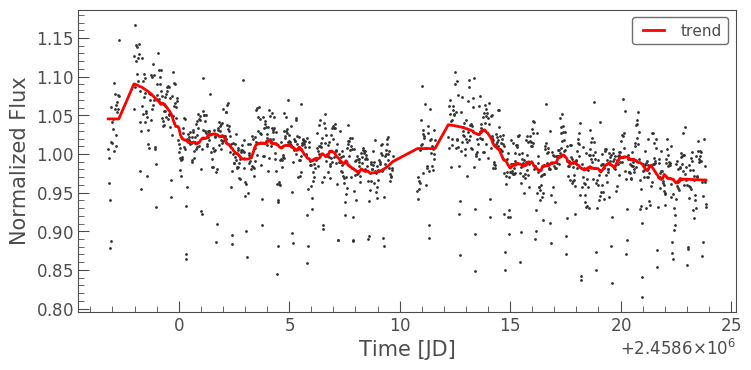

In [6]:
flat,trend = lc.flatten(window_length=101, return_trend=True)
ax = lc.scatter()
trend.plot(ax=ax, c='r', lw=2, label='trend')

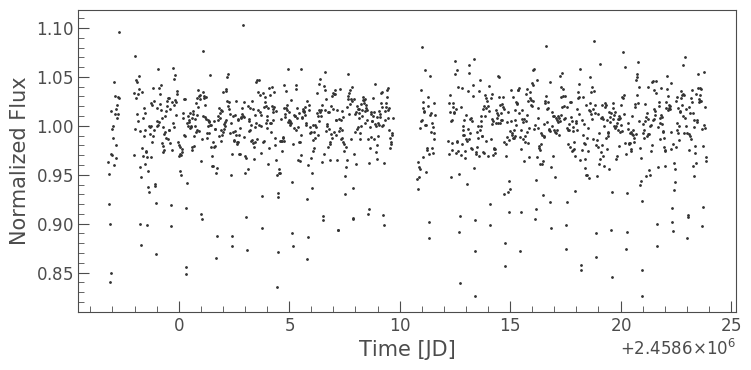

In [7]:
flat.scatter()

In [8]:
from transitleastsquares import transitleastsquares as tls

tls_results = tls(flat.time, flat.flux).power()

  0%|          | 0/2465 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 1182 data points, 2465 periods from 0.602 to 13.531 days
Using all 8 CPU threads


100%|██████████| 2465/2465 periods | 00:04<00:00 


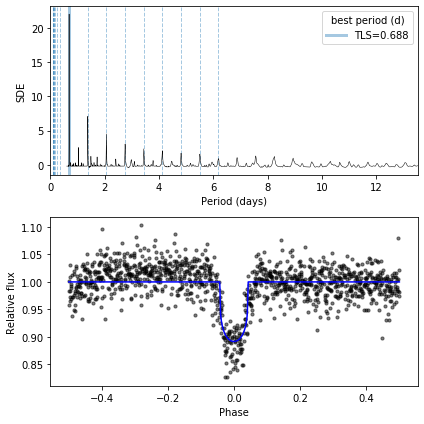

In [9]:
fig = cr.plot_tls(tls_results, figsize=(6,6))

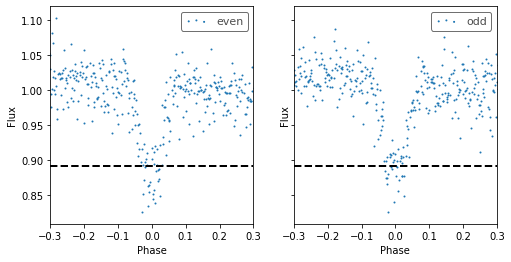

In [10]:
fig = cr.plot_odd_even(flat, tls_results, yline=tls_results['depth'])
for ax in fig.axes: 
    ax.set_xlim(-0.3,0.3)